# Stock Market Prediction Using Support Vector Regressor 
Sept-Oct 2020

**Aim:** Program to predict Stock prices for a given day

In [ ]:
#Import Libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
#Loading the Data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
#Read the Data
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-11,64.574997,65.617500,64.570000,65.550003,64.460991,81821200
1,2019-11-12,65.387497,65.697502,65.230003,65.489998,64.401978,87388800
2,2019-11-13,65.282501,66.195000,65.267502,66.117500,65.019051,102734400
3,2019-11-14,65.937500,66.220001,65.525002,65.660004,64.569160,89182800
4,2019-11-15,65.919998,66.445000,65.752502,66.440002,65.336212,100206400


In [ ]:
df.shape

(253, 7)

Visualizing the data


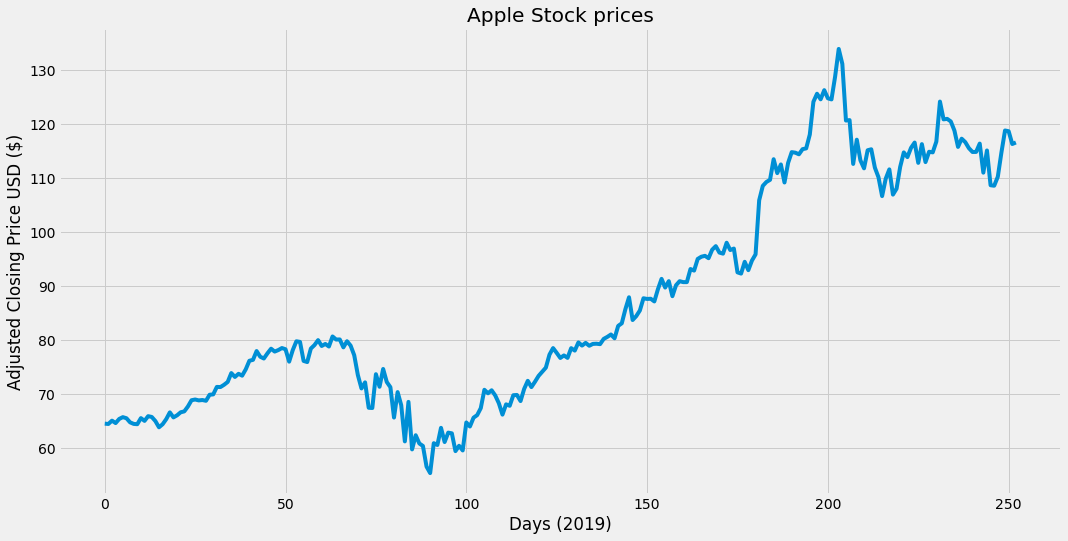

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Apple Stock prices")
plt.xlabel("Days (2019)")
plt.ylabel("Adjusted Closing Price USD ($)")
plt.plot(df['Adj Close'])
plt.show()

In [ ]:
df = df[['Adj Close']]
df.head()

,Adj Close
0,64.460991
1,64.401978
2,65.019051
3,64.569160
4,65.336212


In [ ]:
#Transform data to predict future prices 
future_days = 25

df['Prediction'] = df[['Adj Close']].shift(-future_days)
df.tail()

,Adj Close,Prediction
248,114.752022,NaN
249,118.824997,NaN
250,118.690002,NaN
251,116.320000,NaN
252,116.599998,NaN


In [ ]:
#Feature Set
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 64.460991]
 [ 64.401978]
 [ 65.019051]
 [ 64.56916 ]
 [ 65.336212]
 [ 65.665634]
 [ 65.466507]
 [ 64.704376]
 [ 64.414268]
 [ 64.357727]
 [ 65.486168]
 [ 64.974815]
 [ 65.847565]
 [ 65.702515]
 [ 64.942841]
 [ 63.784916]
 [ 64.347893]
 [ 65.291946]
 [ 66.553131]
 [ 65.621384]
 [ 66.004898]
 [ 66.567886]
 [ 66.737518]
 [ 67.644707]
 [ 68.802635]
 [ 68.937851]
 [ 68.773132]
 [ 68.841965]
 [ 68.699387]
 [ 69.820442]
 [ 69.886818]
 [ 71.273392]
 [ 71.246353]
 [ 71.669212]
 [ 72.192863]
 [ 73.840042]
 [ 73.122154]
 [ 73.704819]
 [ 73.358185]
 [ 74.538239]
 [ 76.121498]
 [ 76.293579]
 [ 77.923538]
 [ 76.871323]
 [ 76.541885]
 [ 77.500694]
 [ 78.358696]
 [ 77.827667]
 [ 78.105476]
 [ 78.481621]
 [ 78.25544 ]
 [ 75.954315]
 [ 78.103012]
 [ 79.7379  ]
 [ 79.622337]
 [ 76.091995]
 [ 75.883018]
 [ 78.388199]
 [ 79.027405]
 [ 79.951775]
 [ 78.865021]
 [ 79.239594]
 [ 78.76152 ]
 [ 80.631927]
 [ 80.057739]
 [ 80.077461]
 [ 78.611198]
 [ 79.749702]
 [ 78.931564]
 [ 77.144943]
 [ 73.480522]
 [ 70.

In [ ]:
#Target Data 
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 68.937851  68.773132  68.841965  68.699387  69.820442  69.886818
  71.273392  71.246353  71.669212  72.192863  73.840042  73.122154
  73.704819  73.358185  74.538239  76.121498  76.293579  77.923538
  76.871323  76.541885  77.500694  78.358696  77.827667  78.105476
  78.481621  78.25544   75.954315  78.103012  79.7379    79.622337
  76.091995  75.883018  78.388199  79.027405  79.951775  78.865021
  79.239594  78.76152   80.631927  80.057739  80.077461  78.611198
  79.749702  78.931564  77.144943  73.480522  70.991577  72.117767
  67.403557  67.364128  73.635773  71.297157  74.60424   72.184303
  71.225685  65.592308  70.316368  67.874245  61.171341  68.500175
  59.687832  62.312309  60.786911  60.321156  56.491634  55.291519
  60.838661  60.503517  63.687393  61.050594  62.79285   62.664707
  59.367474  60.35812   59.490692  64.680504  63.931355  65.567657
  66.040802  67.337029  70.737755  70.09211   70.64904   69.690422
  68.243881  66.134438  68.039352  67.775673  69.732323  69.78

In [ ]:
#Train-test split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
print(len(x_test))

print(len(y_test))

57
57


In [ ]:
#Create and Train SVR models 

# Support Vector Regressor Linear Kernel
lin_svr = SVR( kernel ="linear", C = 1000.0)
lin_svr.fit(x_train, y_train)

# Support Vector Regressor Polynomial Kernel degree 2
poly_svr = SVR( kernel ="poly", C = 1000.0, degree=2)
poly_svr.fit(x_train, y_train)

# Support Vector Regressor RBF Kernel
rbf_svr = SVR( kernel ="rbf", C = 1000.0, gamma=0.15)
rbf_svr.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Get the last rows of feature set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future 

array([[133.948898],
       [131.173691],
       [120.671806],
       [120.751671],
       [112.625694],
       [117.117943],
       [113.29454 ],
       [111.807106],
       [115.161316],
       [115.341011],
       [111.936882],
       [110.149963],
       [106.655991],
       [109.890411],
       [111.617432],
       [106.935509],
       [108.033615],
       [112.086624],
       [114.762009],
       [113.893501],
       [115.610542],
       [116.58886 ],
       [112.825348],
       [116.299355],
       [112.965111]])

In [ ]:
#Model predictions

#Linear Model predictions 
lin_predict = lin_svr.predict(x_future)
print(lin_predict)

#Polynomial Model predictions 
poly_predict = poly_svr.predict(x_future)
print(poly_predict)

#RBF Model predictions 
rbf_predict = rbf_svr.predict(x_future)
print(rbf_predict)

[133.47986553 131.05160746 121.86264003 121.93252049 114.82243142
 118.75307145 115.40766005 114.10618109 117.0410567  117.1982867
 114.21973287 112.65620967 109.5990447  112.42910613 113.94021959
 109.84361811 110.80444183 114.35075447 116.69167    115.93174058
 117.43412169 118.29013298 114.9971252  118.03682113 115.11941539]
[140.9847412  137.43199909 124.66105459 124.75415627 115.59709986
 120.58053582 116.32673011 114.70999845 118.38601329 118.58601462
 114.85020468 112.93396746 109.27623283 112.65819663 114.50537272
 109.56451337 110.70434819 115.01218371 117.94269922 116.98379095
 118.88658846 119.98347754 115.81444595 119.65792194 115.96682293]
[114.78156765 109.25582637 123.47225978 124.08577147 116.43448056
 120.58349559 116.48778039 116.11066075 107.96625047 108.36317916
 116.03655449 115.45116146 107.40976064 114.36503711 116.29916007
 111.10844249 114.57425178 116.01758737 108.68241823 114.12848726
 109.81237243 118.925147   116.62659318 116.37218447 116.70028879]


# Visualize The Data for Prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


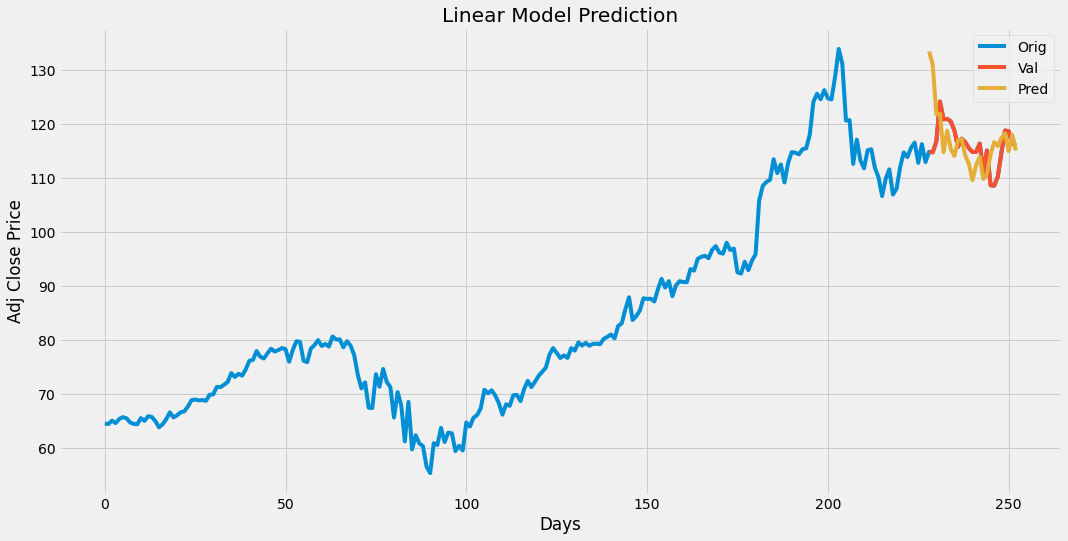

In [ ]:
#Linear Model Data

predictions = lin_predict

valid = df[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title("Linear Model Prediction")
plt.xlabel("Days")
plt.ylabel("Adj Close Price")
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


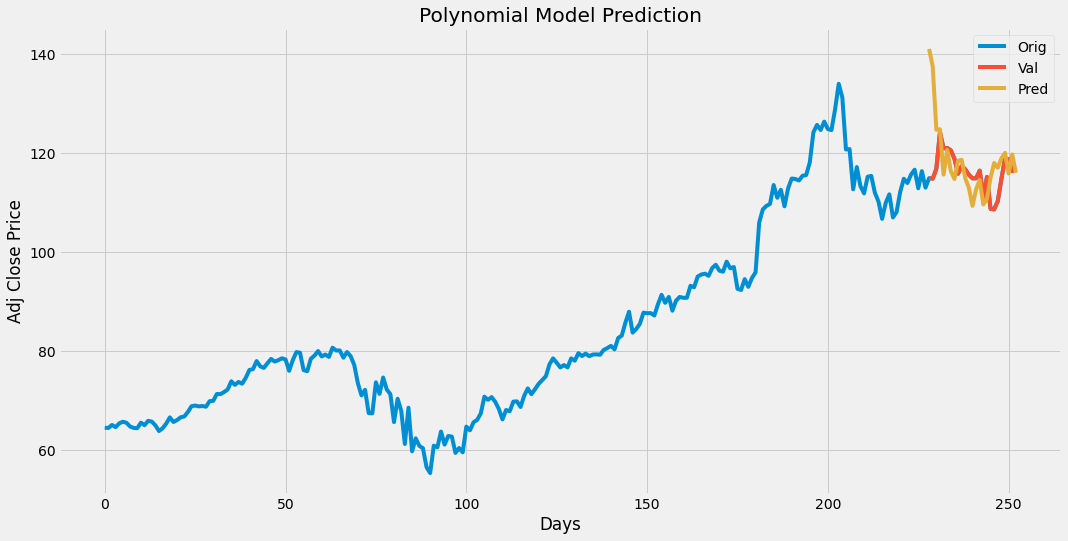

In [ ]:
#Polynomial Model Data

predictions = poly_predict

valid = df[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title("Polynomial Model Prediction")
plt.xlabel("Days")
plt.ylabel("Adj Close Price")
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


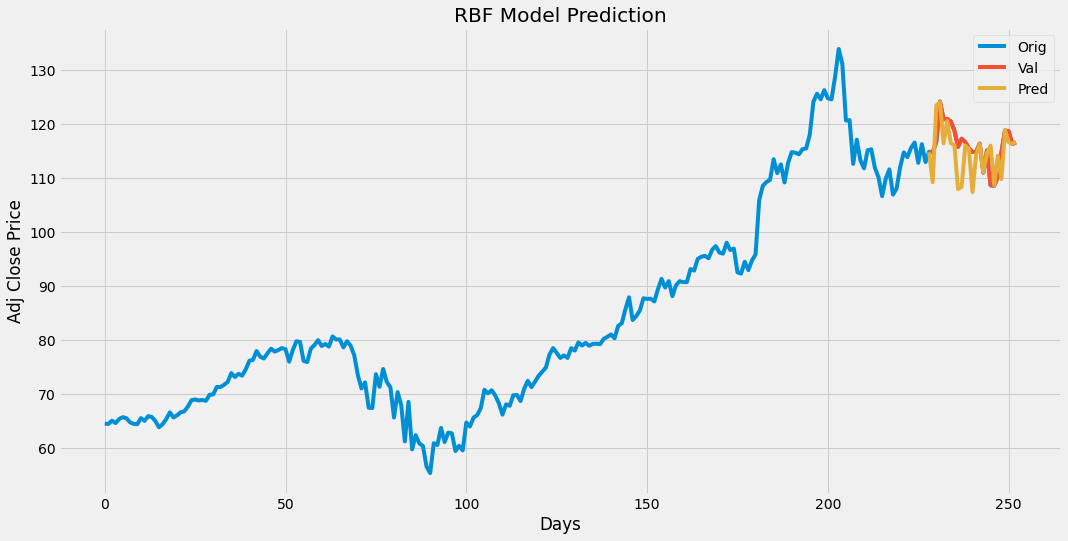

In [ ]:
#Rbf Model Data

predictions = rbf_predict

valid = df[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title("RBF Model Prediction")
plt.xlabel("Days")
plt.ylabel("Adj Close Price")
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
#Accuracy Scores of Models on training set
print("Rbf Model Accuracy Score: " ,rbf_svr.score(x_train,y_train))
print("Polynomial Model Accuracy Score: " ,poly_svr.score(x_train,y_train))
print("Linear Model Accuracy Score: " ,lin_svr.score(x_train,y_train))

Rbf Model Accuracy Score:  0.8713882246963898
Polynomial Model Accuracy Score:  0.6750061797787715
Linear Model Accuracy Score:  0.7002129042230099


In [ ]:
#Accuracy Scores of Models on testing set

print("Rbf Model Accuracy Score: " , rbf_svr.score(x_test,y_test))
print("Polynomial Model Accuracy Score: " , poly_svr.score(x_test,y_test))
print("Linera Model Accuracy Score: " , lin_svr.score(x_test,y_test))

Rbf Model Accuracy Score:  0.6337237544729999
Polynomial Model Accuracy Score:  0.6533766511904124
Linera Model Accuracy Score:  0.6927767412302659
